# Bike Sharing Demand Prediction

# Problem Statement:

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes**

# 1. Importing Libraries

Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split

# 2. Dataset

## Dataset Loading

In [2]:
bike_df=pd.read_csv("BikeData.csv",encoding='unicode_escape')

print("Dataset Information:\n\nThis dataset contains the data of rented bike count in the city. It presents the count of bikes rented per hour and the weather conditions for the day. The data is of one year from December 2017 to November 2018.")

Dataset Information:

This dataset contains the data of rented bike count in the city. It presents the count of bikes rented per hour and the weather conditions for the day. The data is of one year from December 2017 to November 2018.


## View Data

In [3]:
#Dataset First Rows
print("Dataset First Rows: \n\n", bike_df.head(5))

#Dataset Last Rows
print("\n\n\nDataset Last Rows: \n\n", bike_df.tail())

#more ways to view data:
# bike_df
# print(bike_df)

Dataset First Rows: 

          Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0 

In [4]:
print("\n\n********************************************* Data Set *********************************************\n\n")
bike_df



********************************************* Data Set *********************************************




,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Dataset Rows and Columns Count

In [5]:
# computing number of rows
rows=len(bike_df.axes[0])

# computing number of columns
columns=len(bike_df.axes[1])

print("NUmber of rows : ",rows)
print("Number of columns : ",columns)

print("\nFrom above information , we can see that there are total 8760 rows in dataset. Also there are total 14 columns with no Null values\n\n")

NUmber of rows :  8760
Number of columns :  14

From above information , we can see that there are total 8760 rows in dataset. Also there are total 14 columns with no Null values




## 3. Understanding Your Variables

In [6]:
# Dataset Columns
bike_df.columns=map(str.lower, bike_df.columns)
bike_df.columns

Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [7]:
# Dataset Describe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented bike count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind speed (m/s)           8760 non-null   float64
 6   visibility (10m)           8760 non-null   int64  
 7   dew point temperature(°c)  8760 non-null   float64
 8   solar radiation (mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall (cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning day            8760 non-null   objec

### Variable Description

#### Dependent Variable

In [8]:
dependent_var ="rented bike count"

In [9]:
bike_df[dependent_var].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented bike count, dtype: float64

#### Independent Variables

##### Numerical Variables

In [10]:
# numerical variables

numerical_var =list(bike_df.describe().columns[1:])
numerical_var

['hour',
 'temperature(°c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(°c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)']

In [11]:
bike_df[numerical_var].describe().T

,count,mean,std,min,25%,50%,75%,max
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temperature(°c),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew point temperature(°c),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar radiation (mj/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [12]:
# Unique count of numerical variables

lst=[]
for col in numerical_var:
  lst.append(bike_df[col].nunique())

unique_cnt_df=pd.DataFrame(index=numerical_var,columns=["unique_count"])
unique_cnt_df["unique_count"]=lst
unique_cnt_df

,unique_count
hour,24
temperature(°c),546
humidity(%),90
wind speed (m/s),65
visibility (10m),1789
dew point temperature(°c),556
solar radiation (mj/m2),345
rainfall(mm),61
snowfall (cm),51


##### Categorical Variables

In [13]:
categorical_var=list(bike_df.select_dtypes(include='object'))
categorical_var

['date', 'seasons', 'holiday', 'functioning day']

In [14]:
# Season Columns
print(f"Count of distinct catrgories in season variable :{bike_df['seasons'].nunique()}")
print(list(bike_df["seasons"].unique()))

Count of distinct catrgories in season variable :4
['Winter', 'Spring', 'Summer', 'Autumn']


In [15]:
# Holiday Columns
print(f"Count of distinct categories in holiday variable:{bike_df['holiday'].nunique()}")
print(list(bike_df['holiday'].unique()))

Count of distinct categories in holiday variable:2
['No Holiday', 'Holiday']


In [16]:
# Functioning day columns
print(f"Count of distinct categories in functioning day variable:{bike_df['functioning day'].nunique()}")
print(list(bike_df["functioning day"].unique()))

Count of distinct categories in functioning day variable:2
['Yes', 'No']


# 3 Handling Missing Values

In [17]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

In [18]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

date                         0
rented bike count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind speed (m/s)             0
visibility (10m)             0
dew point temperature(°c)    0
solar radiation (mj/m2)      0
rainfall(mm)                 0
snowfall (cm)                0
seasons                      0
holiday                      0
functioning day              0
dtype: int64

# 4 Data Transformation

In [19]:
# converting the dtype of date column
def get_date(str_date):
  date_obj= dt.datetime.strptime(str_date,'%d/%m/%Y')
  date_obj = pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

bike_df['date'] = bike_df['date'].apply(get_date)


In [20]:
# extracting the day, month and day of the week

bike_df['day'] = bike_df['date'].apply(lambda x : x.day)
bike_df['month'] = bike_df['date'].apply(lambda x : x.month)
bike_df['day_of_week'] = bike_df['date'].dt.day_name()

bike_df = bike_df.drop("date", axis=1)

bike_df.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,day_of_week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,Friday


In [21]:
# creating column of weekend by replacing the days with 1 and 0
bike_df['weekend'] = bike_df['day_of_week'].apply(lambda x : 1 if x == 'Sunday' or x == 'Saturday' else 0)
bike_df.drop('day_of_week', axis = 1, inplace= True)

In [22]:
bike_df.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),dew point temperature(°c),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0


In [23]:
bike_df.columns

Index(['rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day', 'day', 'month', 'weekend'],
      dtype='object')

# 5 Feature Manipulation and Selection

dont't need to manipulate features because in VIF I have already drop the feature with high multicollinearity and also created some new features while Data Exploration.


# 6 Data Scaling

Data is scaled enough to make predictions.

# 7 Multicollinearity

In [24]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [25]:
calc_vif(bike_df[[i for i in numerical_var]])

,variables,VIF
0,hour,4.418242
1,temperature(°c),33.385256
2,humidity(%),5.371996
3,wind speed (m/s),4.805364
4,visibility (10m),9.085977
5,dew point temperature(°c),17.126199
6,solar radiation (mj/m2),2.881590
7,rainfall(mm),1.081567
8,snowfall (cm),1.120833


In [26]:
# droping 'dew point temperature(°c)', 'day', 'month'

calc_vif(bike_df[[ i for i in numerical_var if i not in ['dew point temperature(°c)', 'day', 'month']]])

,variables,VIF
0,hour,3.921832
1,temperature(°c),3.228318
2,humidity(%),4.868221
3,wind speed (m/s),4.608625
4,visibility (10m),4.710170
5,solar radiation (mj/m2),2.246791
6,rainfall(mm),1.079158
7,snowfall (cm),1.120579


In [27]:
# droping 'dew point temperature(°c)', 'day', 'month' from original dataset
data= bike_df.drop(['dew point temperature(°c)', 'day', 'month'], axis=1)

In [28]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

data[['seasons', 'holiday', 'functioning day']] = data[['seasons', 'holiday', 'functioning day']].apply(label_en.fit_transform)

In [29]:
data.head()

,rented bike count,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0


# 8. Data Visualization

## Univariate Analysis

### A] Distribution of dependent variables 'rented bike count'

/tmp/ipykernel_14650/1647913312.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_df[dependent_var])


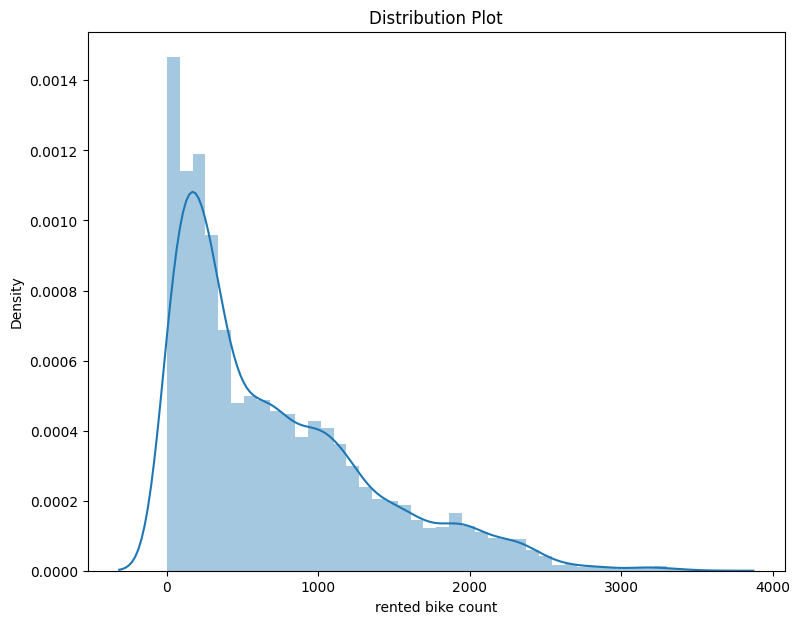

In [30]:
plt.figure(figsize=(9,7))
sns.distplot(bike_df[dependent_var])
plt.title("Distribution Plot")
plt.show()

#### Why this chart? 
to know how the Depedent variables(rented bike count) are dsitributed along the Independent features

#### Insight(s) found from the chart?

Dependent variable i.e rented bike count is slightly skewed towards right side (positively skewed). So we will apply transformation and again look at the distribution.

Below are some transformation technique to reduce skewness.

<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data


/tmp/ipykernel_14650/303741459.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(bike_df[dependent_var]))


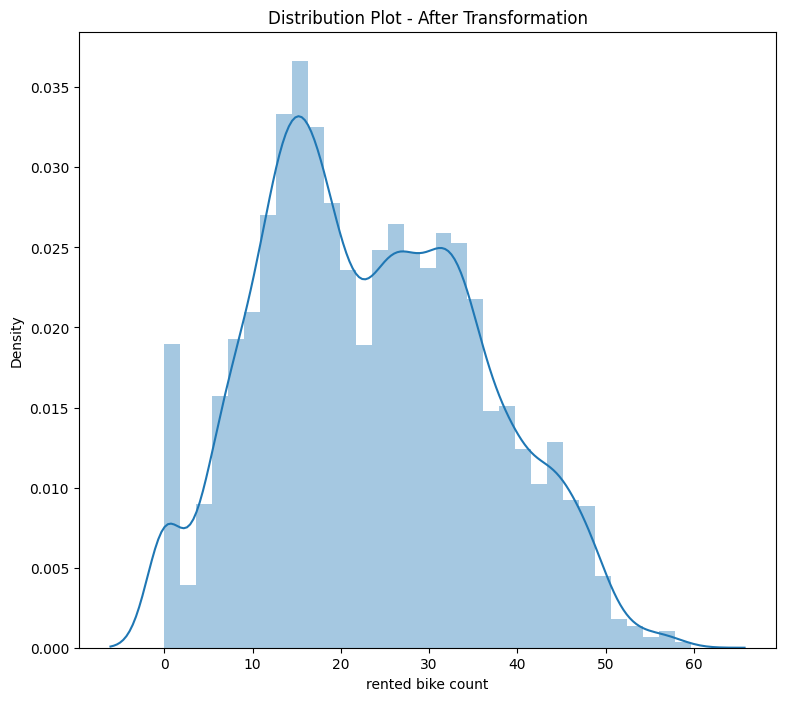

In [31]:
# Applying square-root transformation

plt.figure(figsize=(9,8))
sns.distplot(np.sqrt(bike_df[dependent_var]))
plt.title("Distribution Plot - After Transformation")
plt.show()

It looks good and almost near to the normal distribution

### B] Box Plot

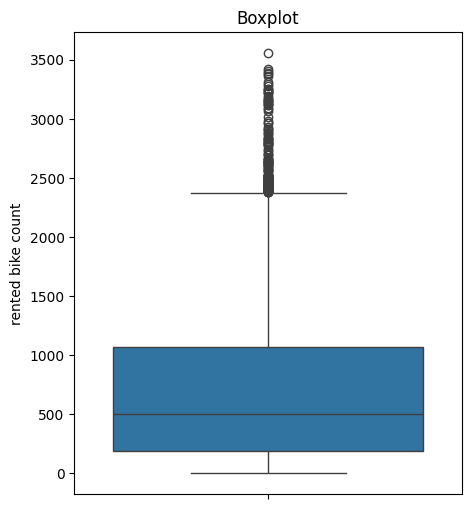

In [32]:
# Chart - 2 visualization code
# Box Plot
plt.figure(figsize=(5,6))
sns.boxplot(y=bike_df[dependent_var])
plt.title("Boxplot")
plt.show()

#### Why this chart?
to know about outliers in dependent variable

#### Insights from this chart
From boxplot, we can see the median value of rented bike count is near 500 and there are some outliers towards upper limit. After applying transformation there will be no outliers.

### C]  Histogram for frequency Distribution (Independent Variables)

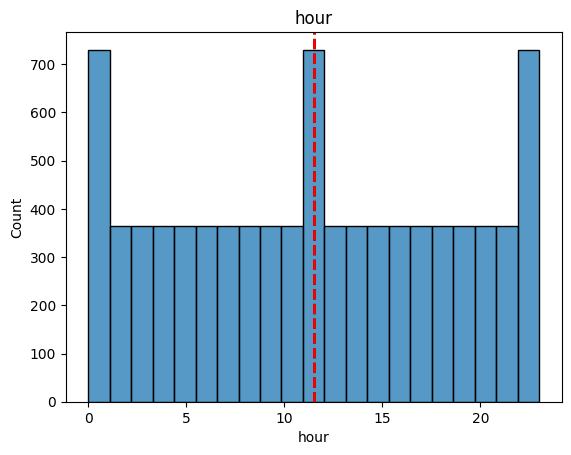

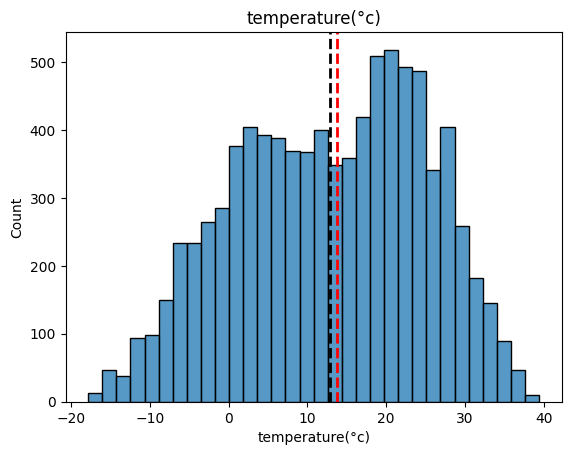

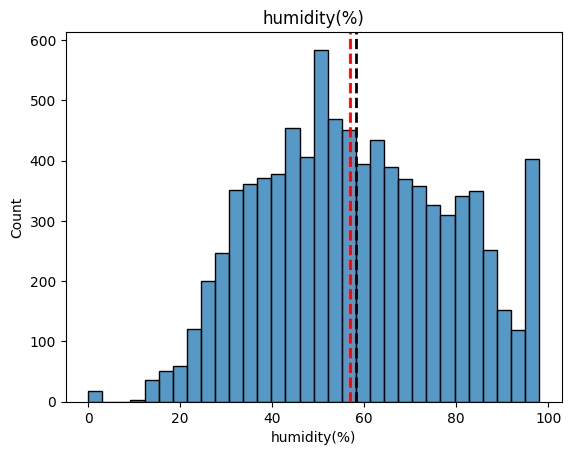

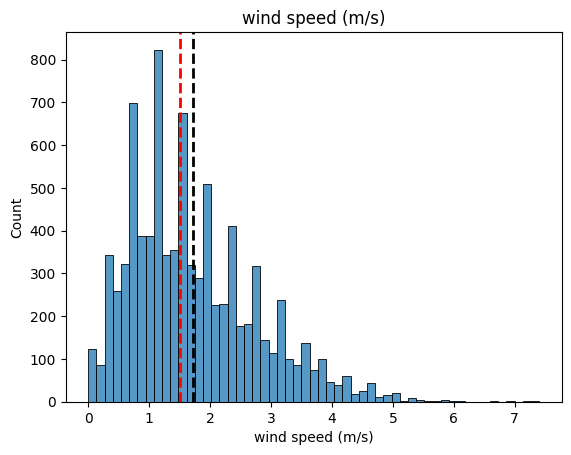

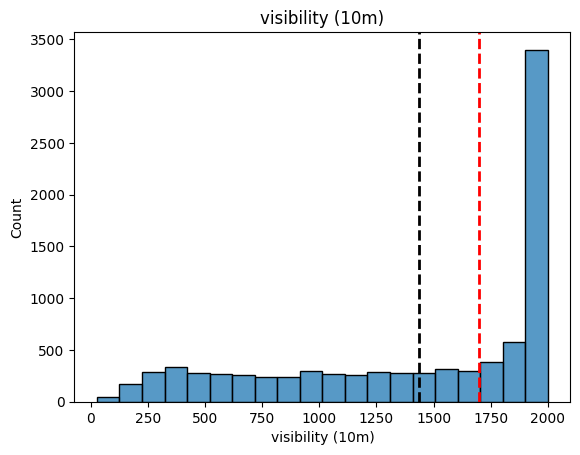

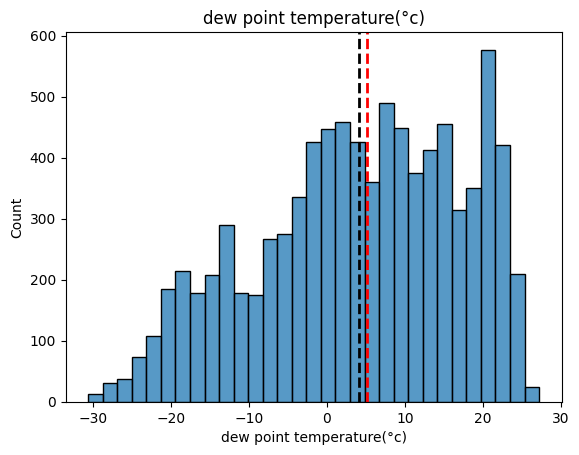

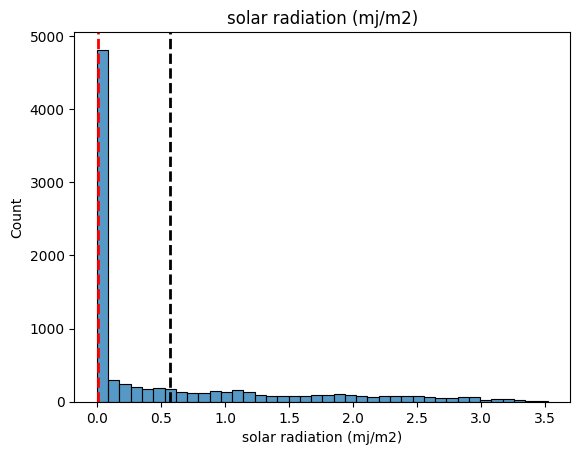

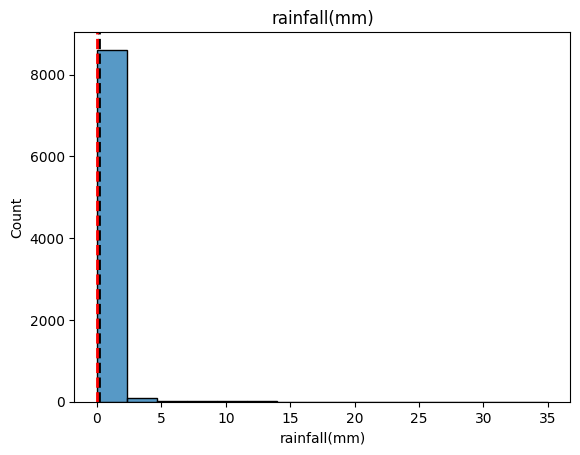

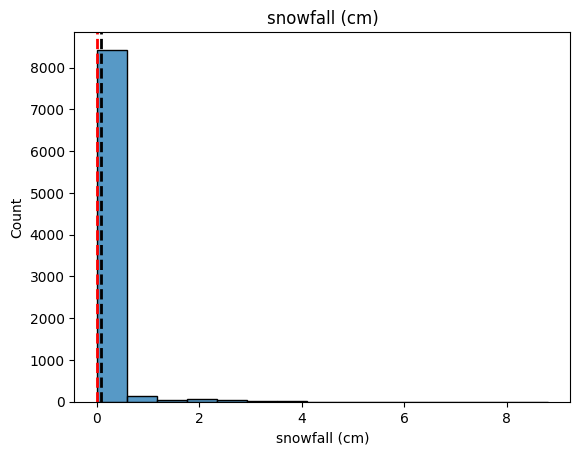

In [33]:
# Chart - 3 visualization code
for col in numerical_var:
  features = bike_df[col]
  sns.histplot(features)
  plt.axvline(features.mean(),color='black',linestyle='dashed',linewidth=2)
  plt.axvline(features.median(),color='red',linestyle='dashed',linewidth=2)
  plt.title(col)
  plt.show()

#### Why this chart?
to show frequency distributiojn of all variables 

#### Insights from the chart
* In the above case we get to know about how the numerical variables are distributed around Average line.
* Histogram is showing the frequency distribution, but average line helps to know the mean of the data for each variable

### D] Boxplot for numerical variables

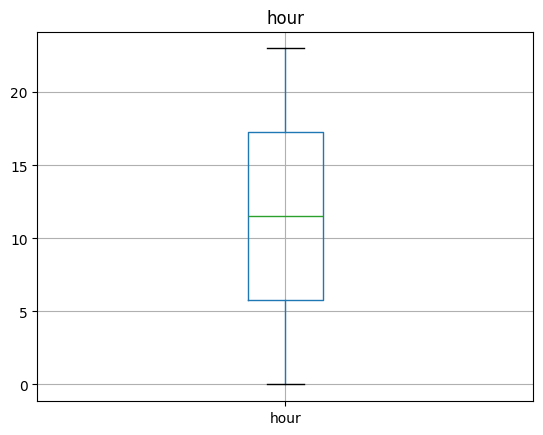

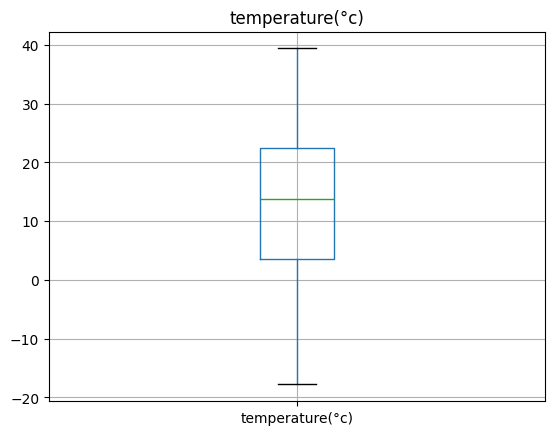

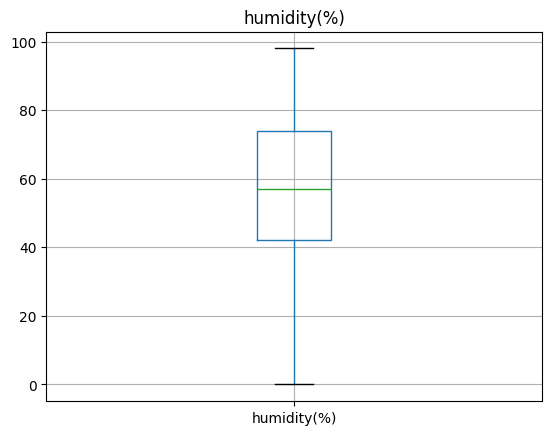

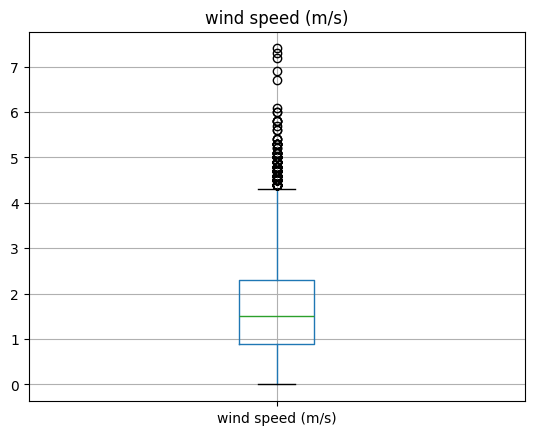

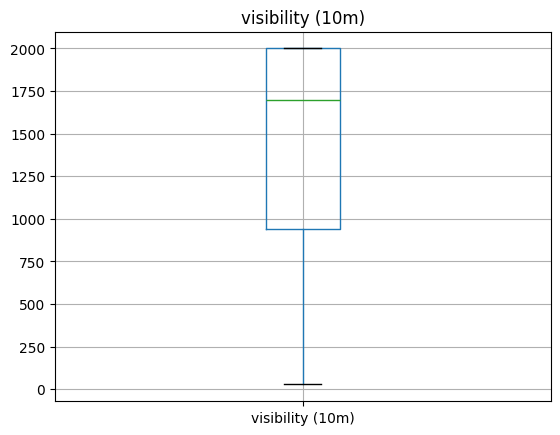

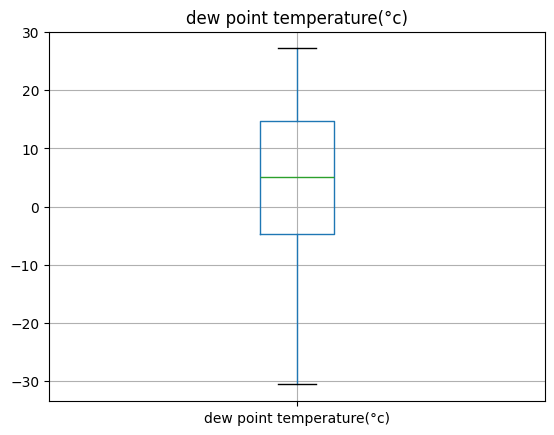

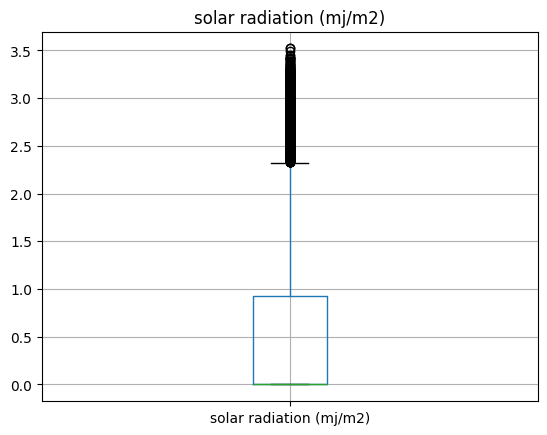

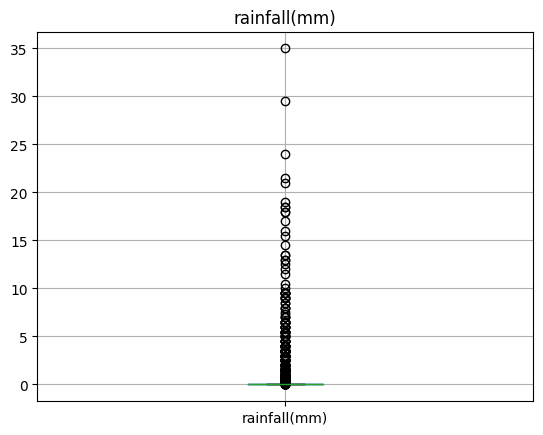

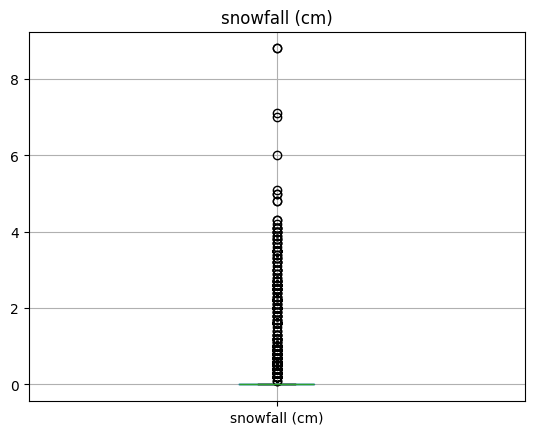

In [34]:
# Chart - 4 visualization code
# boxplot for each numerical features

for col in numerical_var:
  fig=plt.figure()
  ax=fig.gca()
  bike_df.boxplot(col,ax=ax)
  ax.set_title(col)
plt.show()

#### Why this Chart?
Boxplot helps to know how variable is affected by outliers

#### Insights from the chart

* From above plot we can conclude that the numerical variables **Windspeed, Solar radiation, rainfall and snowfall** are affected by outliers
* whereas, the numerical vaiables **hour, temperature, humidity, visibility, dew-point, day and month** are not affected by outliers

### E] Bar chart for Categorical features

In [35]:
categorical_var=list(bike_df.select_dtypes(include='object'))
categorical_var

['seasons', 'holiday', 'functioning day']

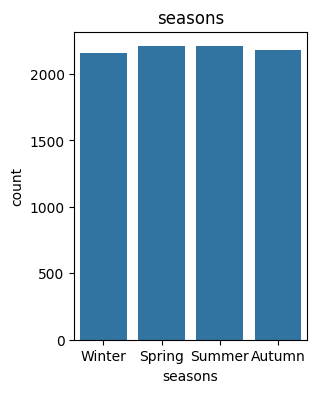

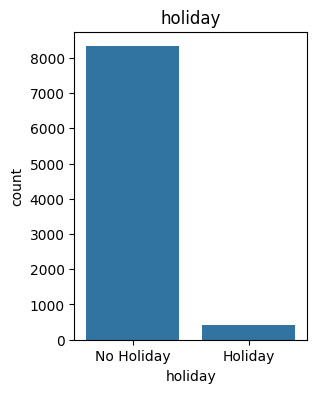

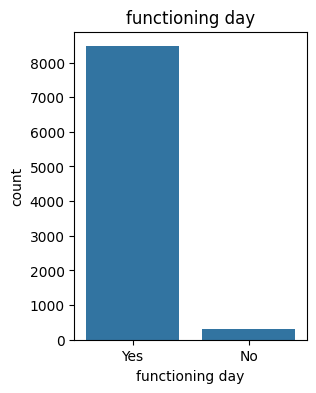

In [36]:
# Chart - 5 visualization code
# Count plot for the categorical features

for col in categorical_var:
  plt.figure(figsize=(3,4))
  sns.countplot(data=bike_df,x=col)
  plt.title(col)
  plt.show()

#### Why this chart ?
It helps to compare diffrent categorical and discretre variables

#### Insights 
* We can say that this columns will not have a greater impact.
* There are very less count of Holiday and No functioning day.

##  Bivariate Analysis

### A ] Scatter-plot for Numerical variabels vs rented bike count

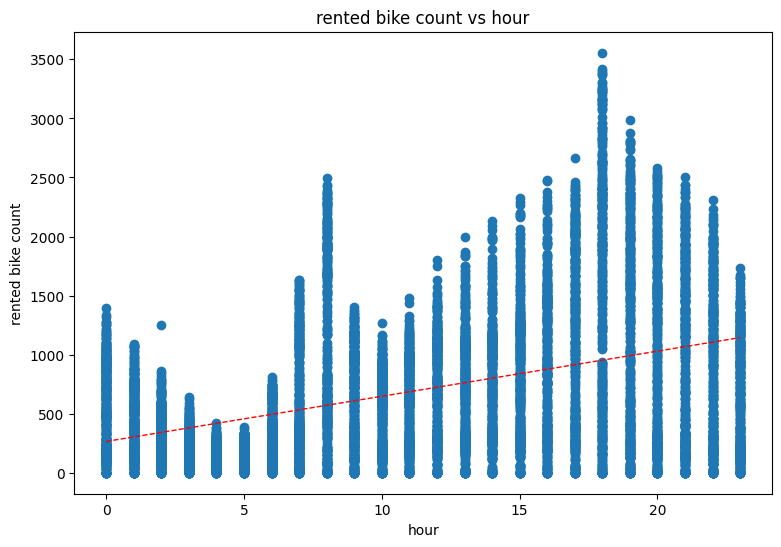

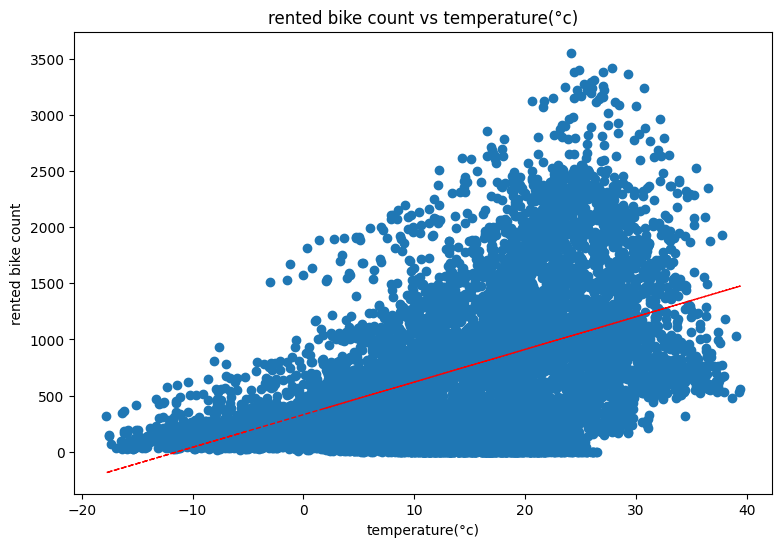

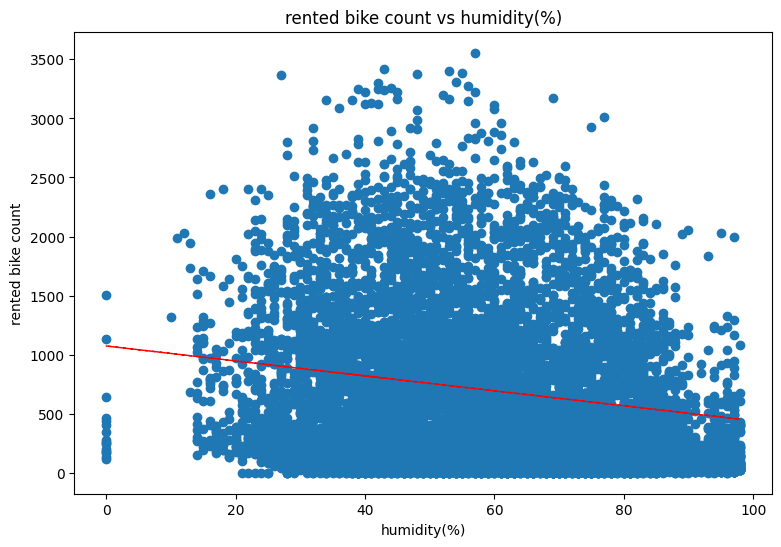

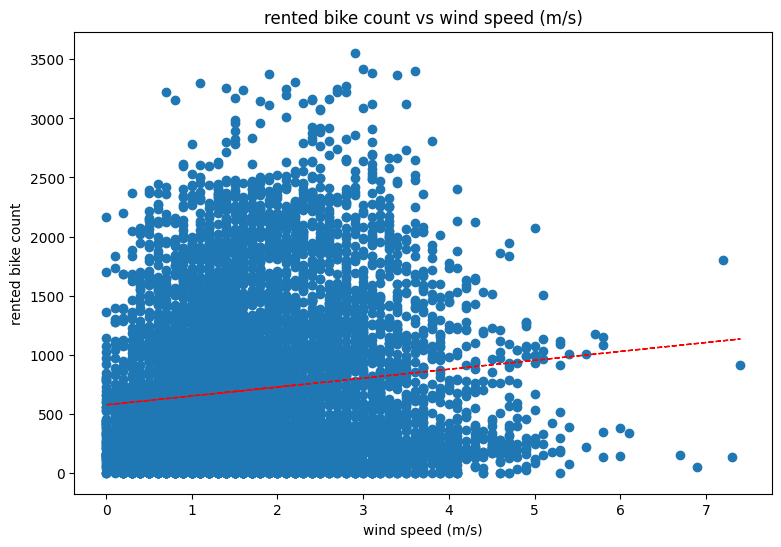

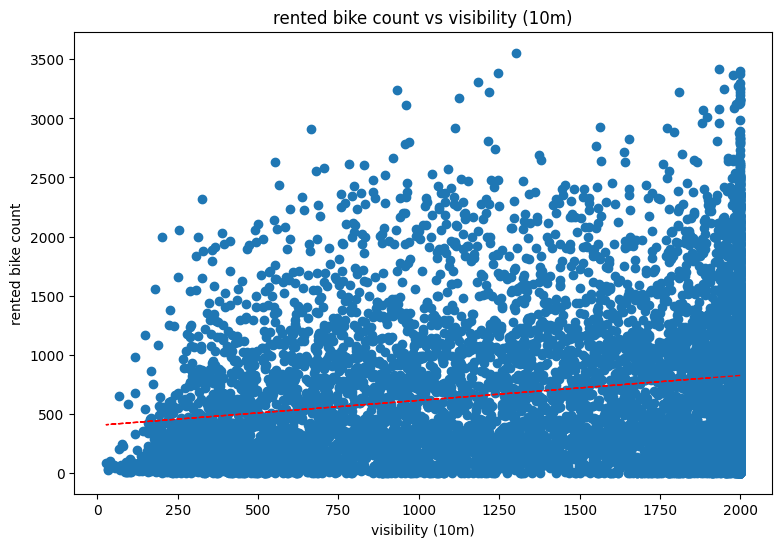

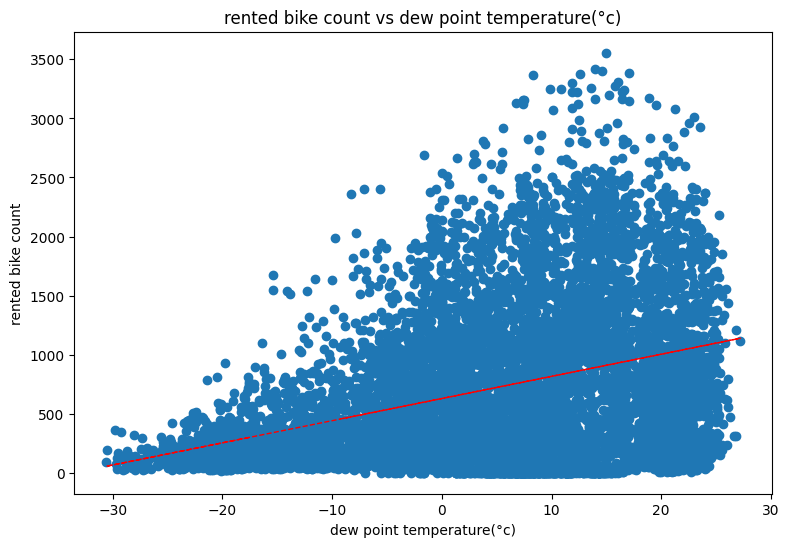

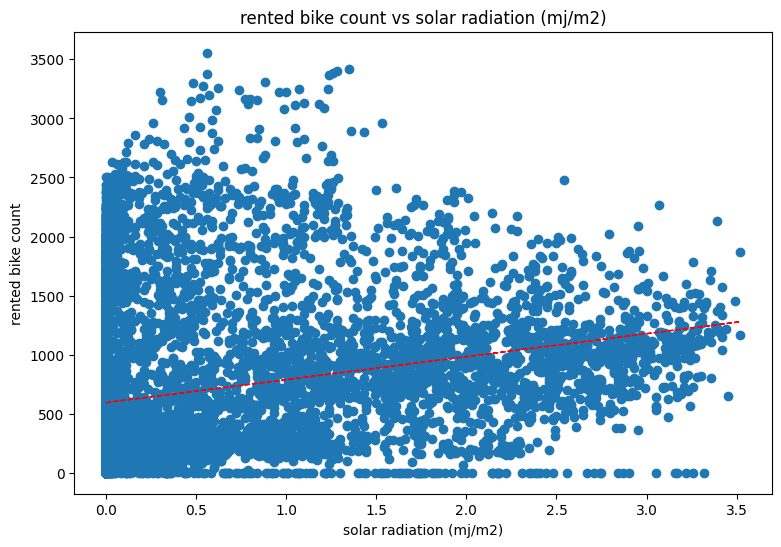

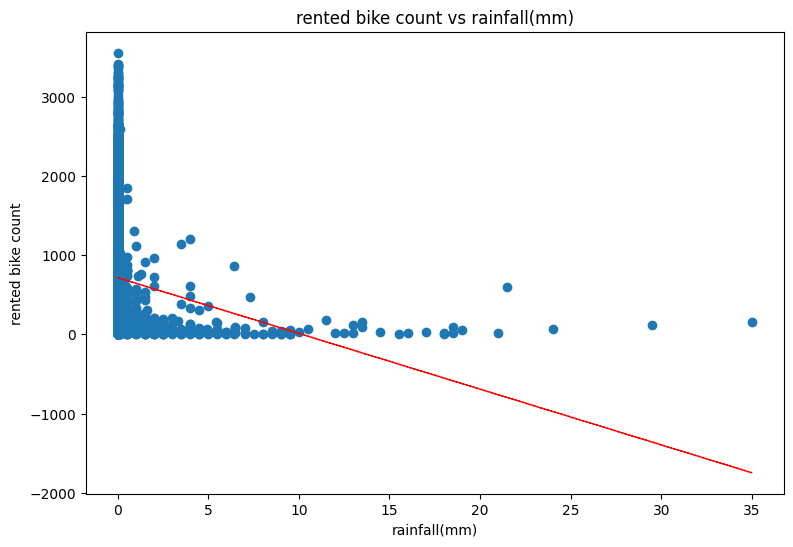

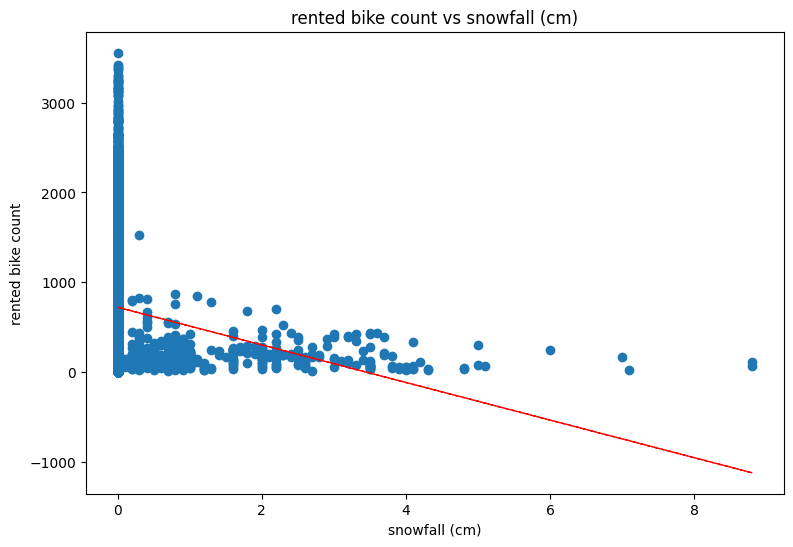

In [37]:
# Chart - 6 visualization code
# Scatter-plot of numerical_var vs rented bike count

for col in numerical_var:
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = bike_df[col]
  label = bike_df['rented bike count']
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('rented bike count')
  ax.set_title('rented bike count vs ' + col)

  z=np.polyfit(bike_df[col],bike_df['rented bike count'], 1)
  y_hat = np.poly1d(z)(bike_df[col])

  plt.plot(bike_df[col],y_hat,"r--",lw=1)

plt.show()

#### Why this chart?
Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimension

#### Insights
* From above we can conclude that the independent variable **rented bike count** is highly correlated with **temperature, humidity, windspeed, visibility, dew point temperature, rainfall and snowfall.**

### B] Boxplot for numerical_var vs rented bike count

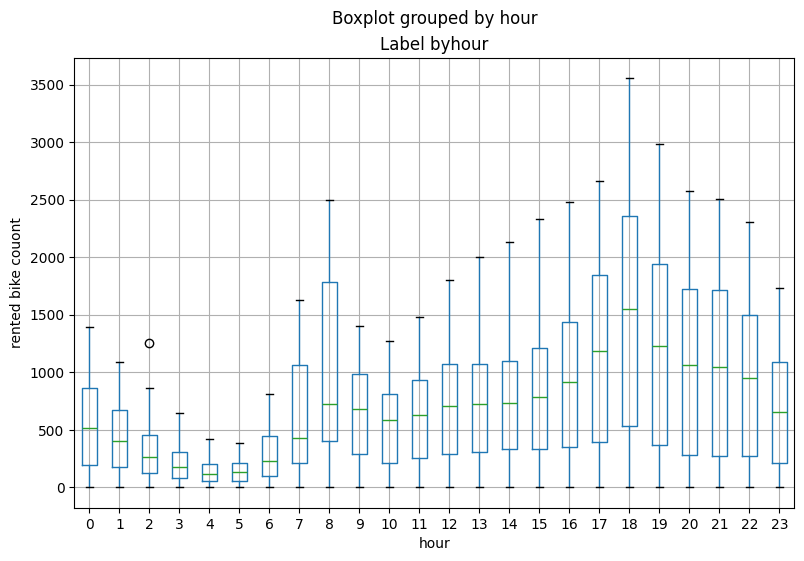

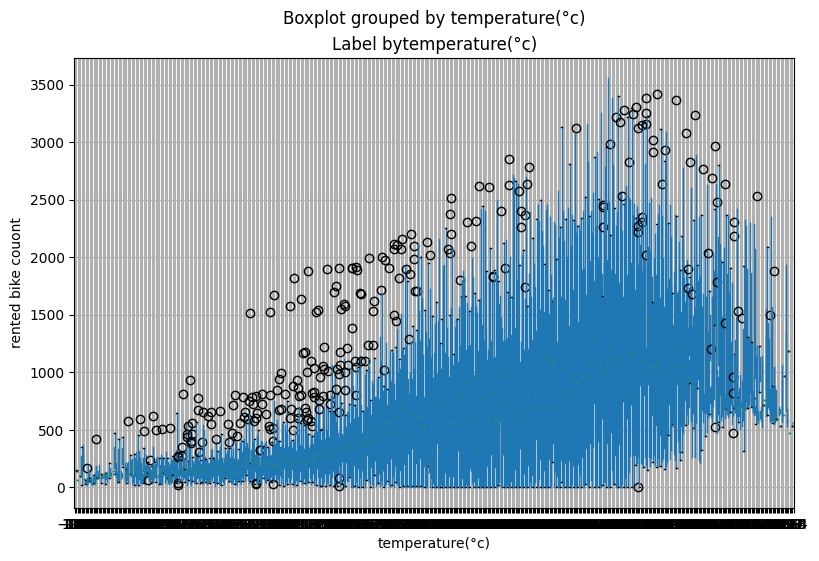

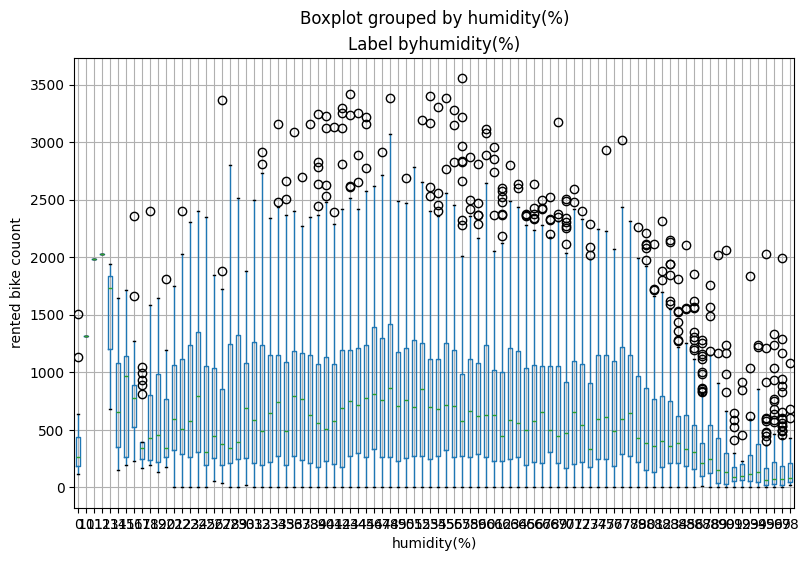

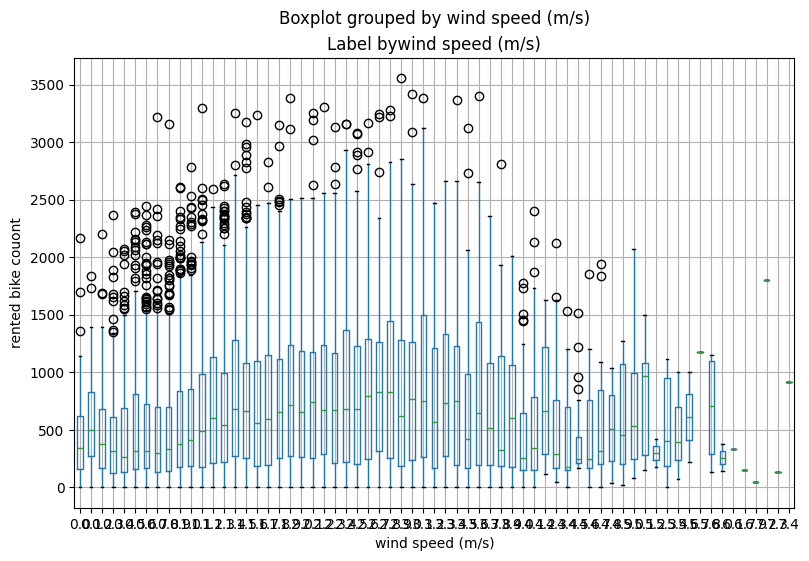

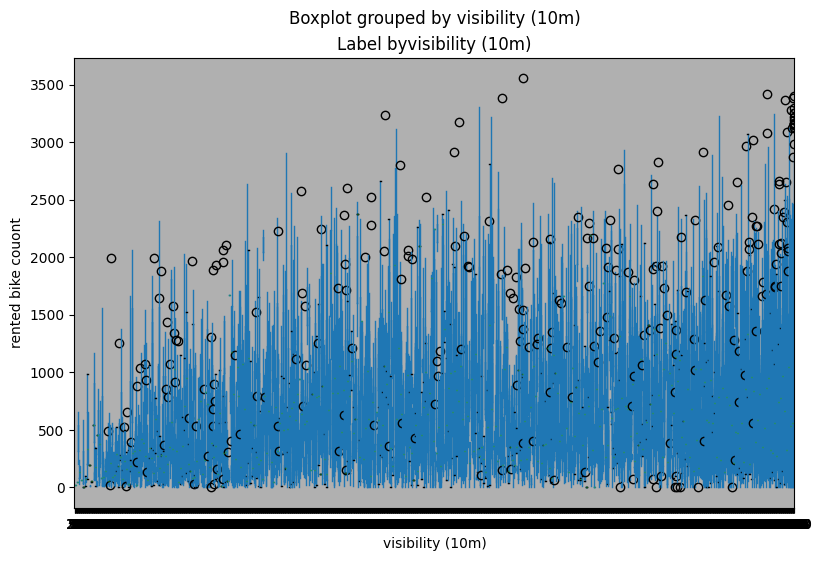

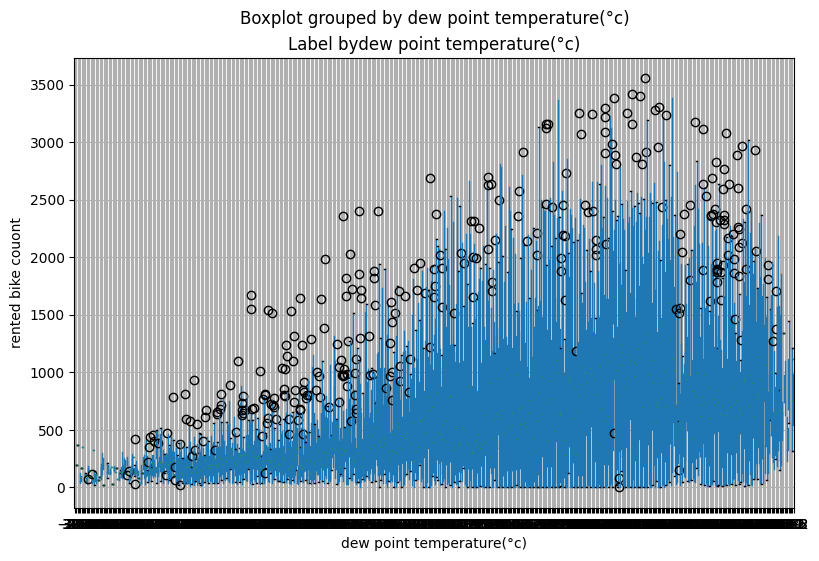

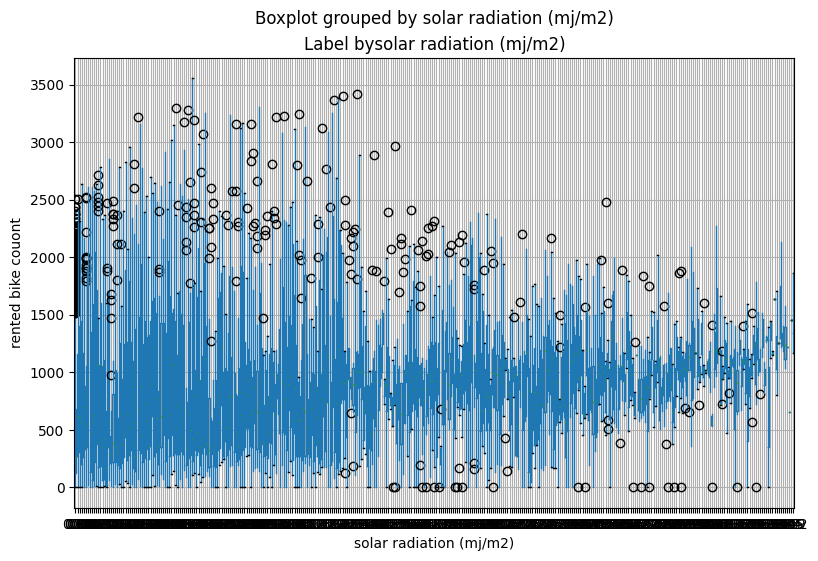

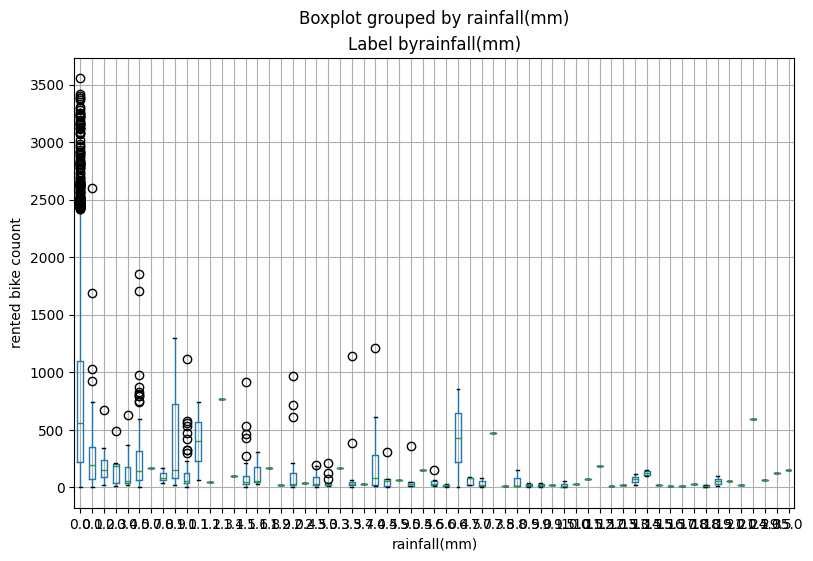

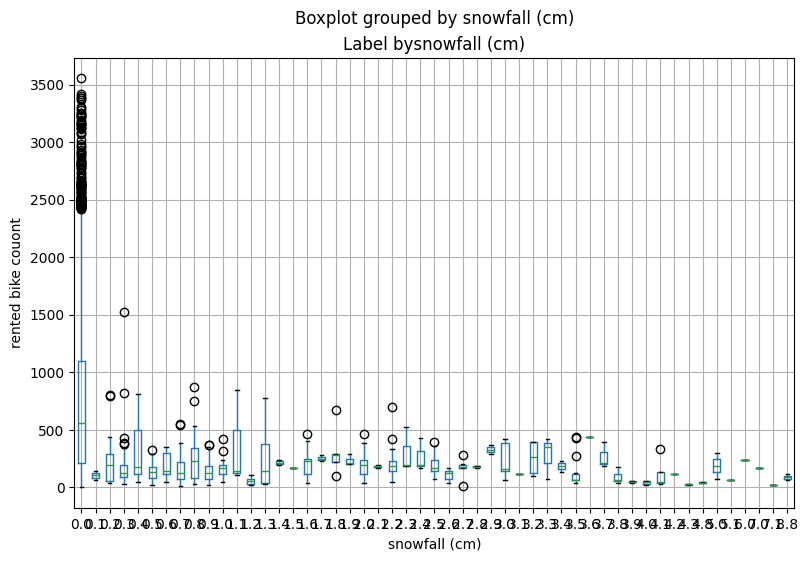

In [38]:
# Chart - 7 visualization code
# Boxplot of numerical_ver vs rented bike count

for col in numerical_var:
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  bike_df.boxplot(column='rented bike count',by=col,ax=ax)
  ax.set_title('Label by' + col)
  ax.set_ylabel("rented bike couont")
plt.show()

#### Why this chart?
It helps to detect outliers



### C] Pie chart Categorical_var vs rented bike count

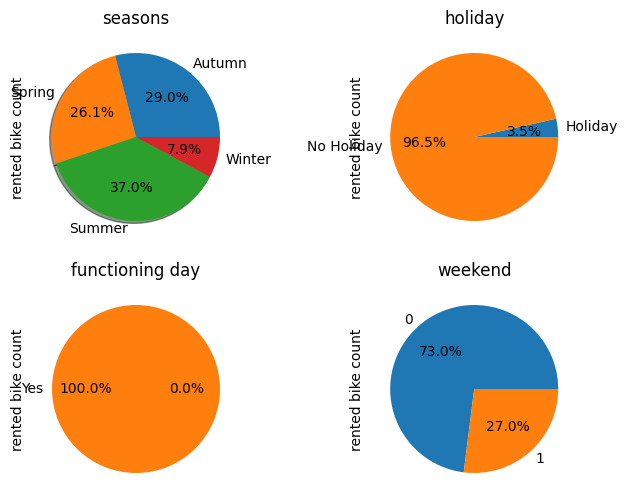

In [39]:
# Chart - 11 visualization code
# Pie chart Categorical_var vs rented bike count

fig, ax = plt.subplots(2,2,figsize=(8,6))

bike_df.groupby('seasons').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', shadow=True,ax= ax[0][0])
ax[0][0].set_title("seasons")

bike_df.groupby('holiday').sum()['rented bike count'].plot.pie(autopct='%1.1f%%',ax= ax[0][1])
ax[0][1].set_title("holiday")

bike_df.groupby('functioning day').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', ax= ax[1][0])
ax[1][0].set_title("functioning day")

bike_df.groupby('weekend').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', ax= ax[1][1])
ax[1][1].set_title("weekend")

plt.show()

#### Why this Chart?
* Pie chart are shown as a percentage of the whole pie, i.e. proportion of each variable

#### Insights
* Above we can see Autumn, Spring and Summer this three seasons has the highest demand of rented bikes.
* on working days there is approximately 97% demand of the rent bikes beccause we can say that people use this rented bike services in order to go to office, etc works, and we can predict that peoples generally on holdays prefer to stay at home or prefer there own vehicles.

### D] Boxplot of categorical_var vs rented bike count

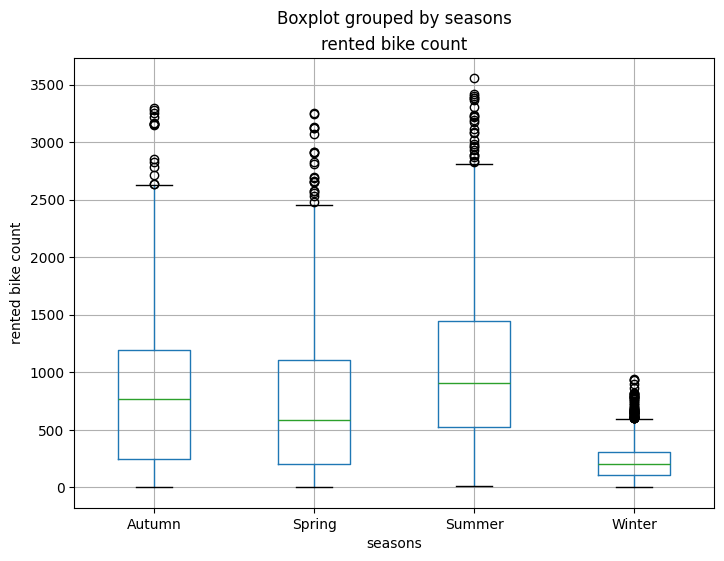

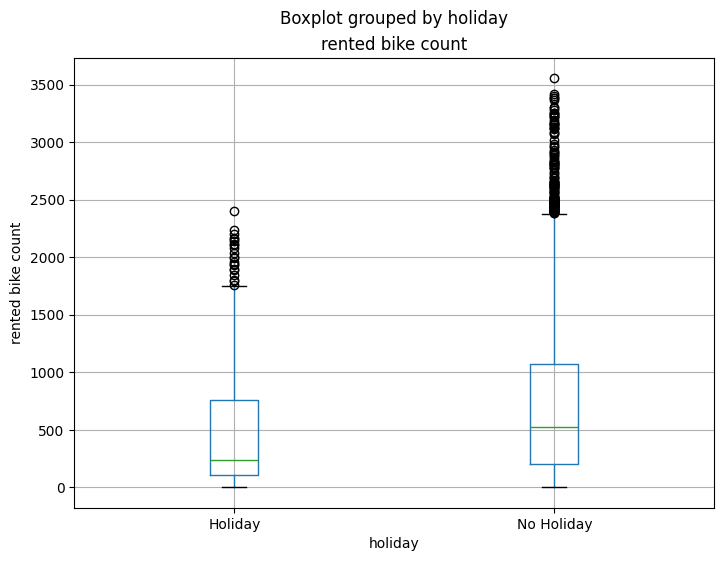

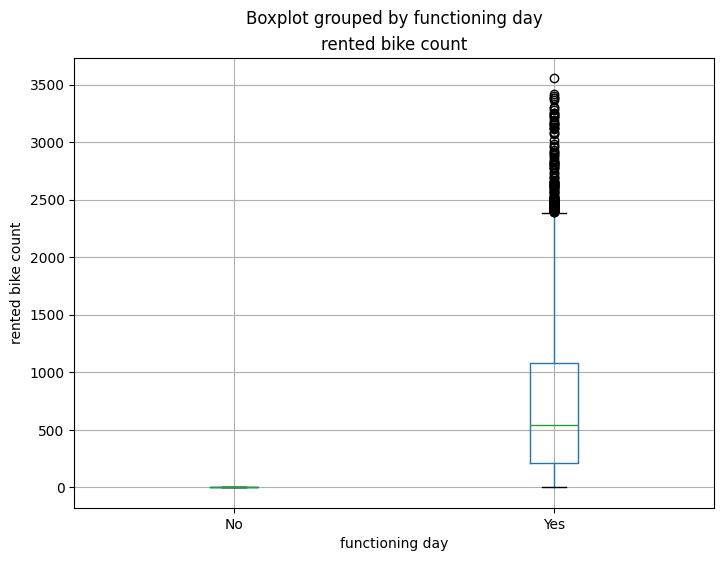

In [40]:
# Chart - 12 visualization code
# Boxplot of categorical_var vs rented bike count

for col in categorical_var:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  bike_df.boxplot(column= 'rented bike count', by = col, ax = ax)
  ax.set_ylabel("rented bike count")
plt.show()

#### Why boxplot 
It helps to detect outliers

#### Insights 
* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer.
* We have seen there are less holidays so obviously rented bike count is also less on holidays.
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

### E] spread of rented bike count across categorical_var

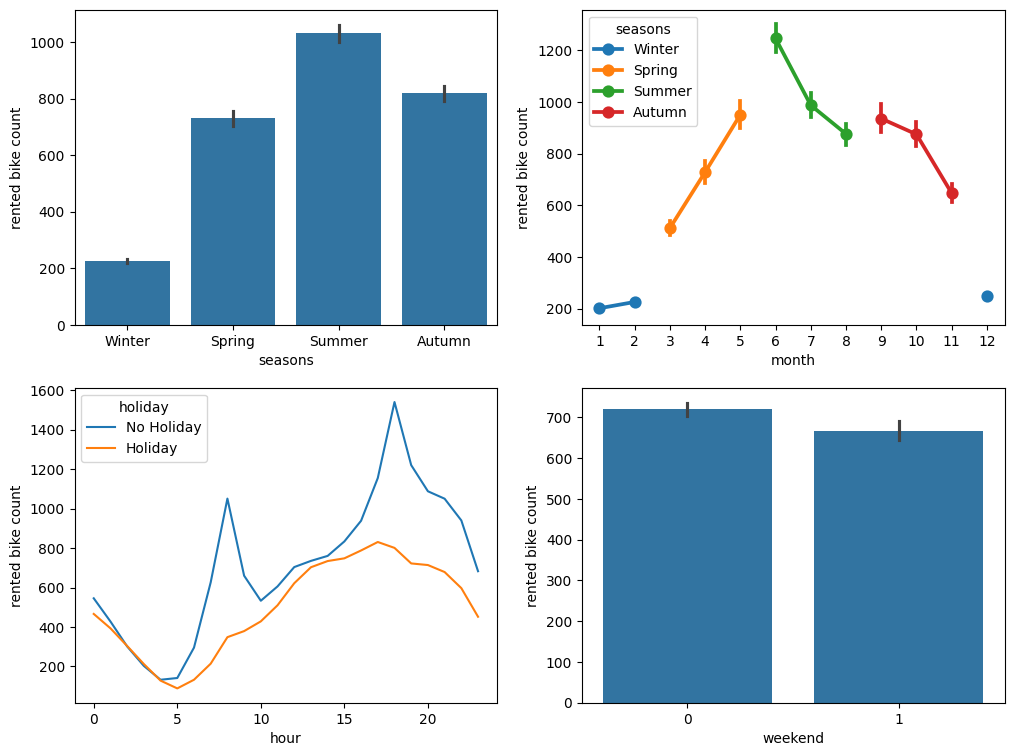

In [41]:
# Chart - 13 visualization code
# spread of rented bike count across categorical_var
fig, ax = plt.subplots(2,2,figsize=(12,9))

sns.barplot(x= 'seasons', y= 'rented bike count', data= bike_df, ax= ax[0][0])

sns.pointplot(x= 'month', y= 'rented bike count', hue= 'seasons',
              data= bike_df, ax= ax[0][1])

sns.lineplot(x= 'hour', y= 'rented bike count', hue= 'holiday',
             errorbar=None, data= bike_df, ax= ax[1][0])

sns.barplot(x= 'weekend', y= 'rented bike count', data= bike_df, ax= ax[1][1])

plt.show()

#### Why this chart ?
The above plots shows how the dependent variable rented bike count is affecting with respect to Independet variables

#### Insights
* There is a huge demand for bike rents in summer season while the least bike rents occur in winter.
* We can see there is a high demand for rented bike in the month of June, August and less demand in the month of December, January and February i.e winter season.
* Non holidays have comparatively high demand for rented bikes as compared to holidays.
* There is a high demand for rented bikes during office days and demand decreases slightly on Sunday.

# 9. Data Splitting

In [42]:
X = data.iloc[:,1:]
y = np.sqrt(data.iloc[:,0])

In [43]:
X.head()

,hour,temperature(°c),humidity(%),wind speed (m/s),visibility (10m),solar radiation (mj/m2),rainfall(mm),snowfall (cm),seasons,holiday,functioning day,weekend
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0


In [44]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented bike count, dtype: float64

In [45]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
print(X_train.shape,y_train.shape)

(6132, 12) (6132,)


In [47]:
print(X_test.shape,y_test.shape)

(2628, 12) (2628,)


# 10. ML Model Implementation

## Evaluation metrices Function

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Create train and test result dictionaries
train_result = {}
test_result = {}

def evaluation_metrics(y_test, y_pred, model=None, train=True):

   ''' takes actual target values and estimated target values as input
      and returns evaluation metrics as output '''

   MSE = mean_squared_error(y_test, y_pred)
   print("MSE :", MSE)
   RMSE = np.sqrt(MSE)
   print("RMSE :", RMSE)
   MAE = mean_absolute_error(y_test, y_pred)
   print("MAE :", MAE)
   R2_score = r2_score(y_test, y_pred)
   print("R2_score :", R2_score)
   Adj_r2_score = 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
   print("Adjusted R2_score :", Adj_r2_score)

   # appending result into dictionary

   if train:
     train_result[model] = [MSE,RMSE,MAE,R2_score,Adj_r2_score]
   else:
     test_result[model] =  [MSE,RMSE,MAE,R2_score,Adj_r2_score]


## Feature Importance Function

In [49]:
def plot_feature_importance(model,X):

  ''' plots feature importance graph '''


  importances = list(model.feature_importances_)

  feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

  importance_df= pd.DataFrame(feature_importances)
  importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

  plt.figure(figsize=(12,6))
  sns.barplot(x='feature_importance', y='feature', data=importance_df, palette='Spectral')

  plt.xlabel("Importance")
  plt.tight_layout()

  plt.show()

## ML Model - Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameters for gradient boosting regressor
gb_params = {'n_estimators' : [50, 100, 150],
              'max_depth' : [5, 6, 7, 8],
              'min_samples_split' : [50, 80],
              'min_samples_leaf' : [40, 50]}

# creat an instance of the Gradient boosting regressor
gb_reg = GradientBoostingRegressor()

# Applying GridSearchCV
gb_grid = GridSearchCV(estimator=gb_reg,
                       param_grid = gb_params,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')


# training the model
gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.9s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
# Best parameters
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 150}

In [52]:
# Optimal model
gb_optimal_model=gb_grid.best_estimator_

In [53]:
#  Model score
gb_optimal_model.score(X_train,y_train)

0.9683883120906536

In [54]:
# Prediction on train and test data
train_pred_gb = gb_optimal_model.predict(X_train)
test_pred_gb = gb_optimal_model.predict(X_test)

### Evaluation metrics for Gradient Boosting Regressor

Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# evaluation metrics on train data
evaluation_metrics(y_train, train_pred_gb, model='Gradient Boosting', train= True)

MSE : 4.917277342679263
RMSE : 2.217493481992509
MAE : 1.4896685104851668
R2_score : 0.9683883120906536
Adjusted R2_score : 0.9682432488956585


In [56]:
# evaluation metrics of test data
evaluation_metrics(y_test, test_pred_gb, model='Gradient Boosting', train=False)

MSE : 10.05592452849494
RMSE : 3.171107776234504
MAE : 2.080592849678758
R2_score : 0.9345309254695227
Adjusted R2_score : 0.9342304937699564


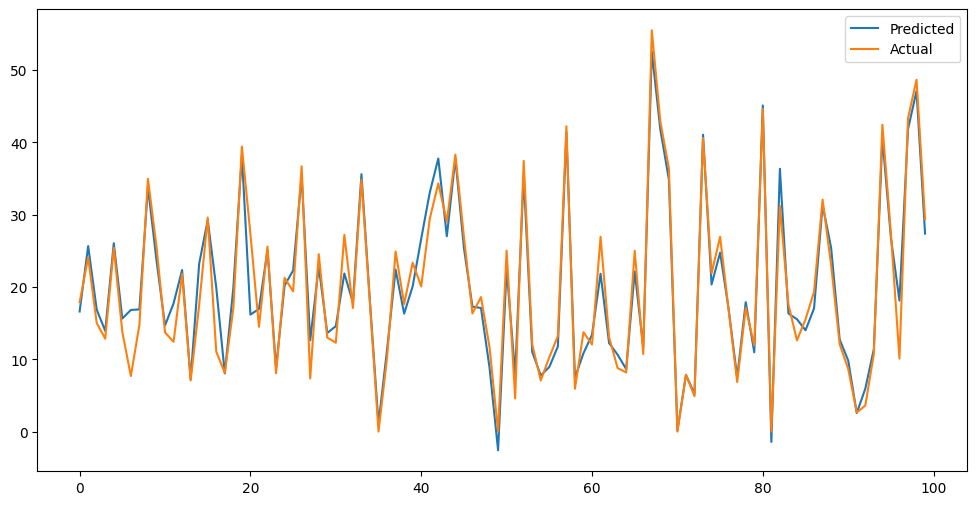

In [57]:
#  plotting the graph of actual and preddicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_gb[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### Feature Importance

In [58]:
gb_optimal_model.feature_importances_

array([0.25046396, 0.2791216 , 0.11811762, 0.00376981, 0.00677295,
       0.04117829, 0.05988008, 0.00104953, 0.06393035, 0.00214075,
       0.15376927, 0.01980578])

In [59]:
# Obtaining feature names
gb_optimal_model.feature_names_in_

array(['hour', 'temperature(°c)', 'humidity(%)', 'wind speed (m/s)',
       'visibility (10m)', 'solar radiation (mj/m2)', 'rainfall(mm)',
       'snowfall (cm)', 'seasons', 'holiday', 'functioning day',
       'weekend'], dtype=object)

/tmp/ipykernel_14650/2723784907.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importance', y='feature', data=importance_df, palette='Spectral')


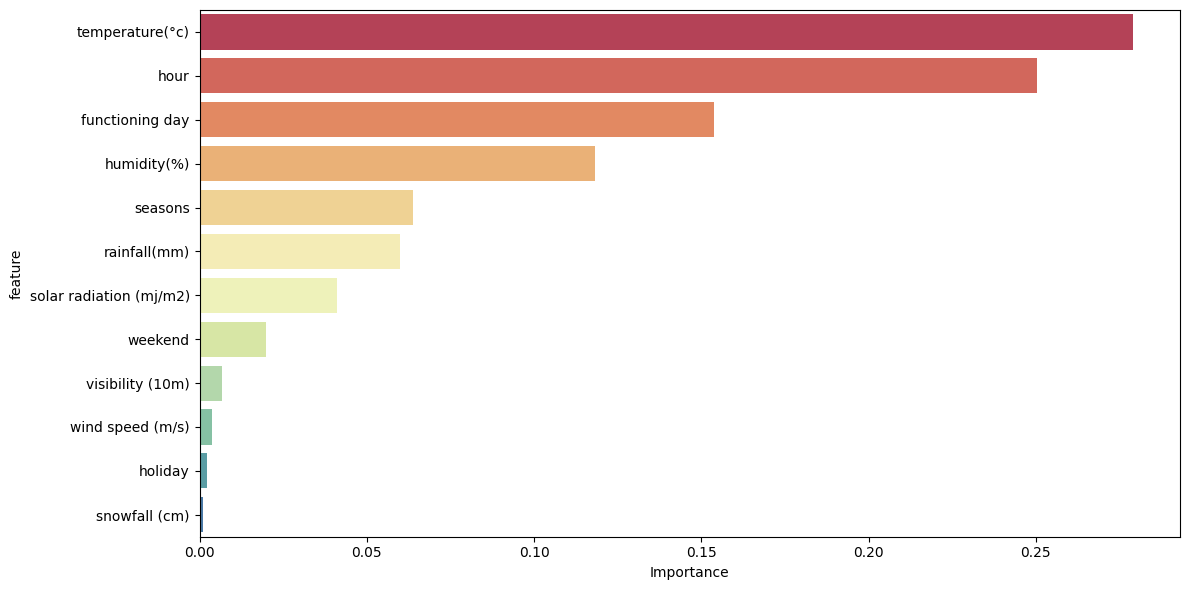

In [60]:
plot_feature_importance(gb_optimal_model,X)

## ML Model - XGBoost Regressor

In [61]:
from xgboost import XGBRegressor

# Hyperparameters for XGBRegressor
xgb_params = {'max_depth':[5,6,7,8],
              'learning_rate':[0.05,0.1,0.2,0.3],
            'n_estimators':[80,100,150],
            'colsample_bytree':[0.5,0.7]
            }

# creating instance of XGBRegressor
xgb_reg = XGBRegressor()

# Grid Search
xgb_grid = GridSearchCV(estimator= xgb_reg, param_grid= xgb_params, cv =3,
                        scoring= 'neg_mean_squared_error', verbose=2)

# training the model on the xgb_grid
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.5, l

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [80, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [62]:
# evaluating the best parameters
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 150}

In [63]:
# creating best estimator model
xgb_optimal_model = xgb_grid.best_estimator_

In [64]:
# model score
xgb_optimal_model.score(X_train, y_train)

0.9906539040594522

In [65]:
# making prediction on train and test data
train_pred_xgb = xgb_optimal_model.predict(X_train)
test_pred_xgb = xgb_optimal_model.predict(X_test)

### Evaluation metrics for XGBoost Regressor

Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# evaluation metric for train set
evaluation_metrics(y_train, train_pred_xgb, model='XG Boost', train=True)

MSE : 1.4538086654137328
RMSE : 1.2057398829821184
MAE : 0.8228522030916567
R2_score : 0.9906539040594522
Adjusted R2_score : 0.9906110156650787


In [67]:
# evaluation metrics of test data
evaluation_metrics(y_test, test_pred_xgb, model='XG Boost', train=False)

MSE : 9.155642436563298
RMSE : 3.0258292147051686
MAE : 2.0311849844624117
R2_score : 0.940392210049385
Adjusted R2_score : 0.9401186752580246


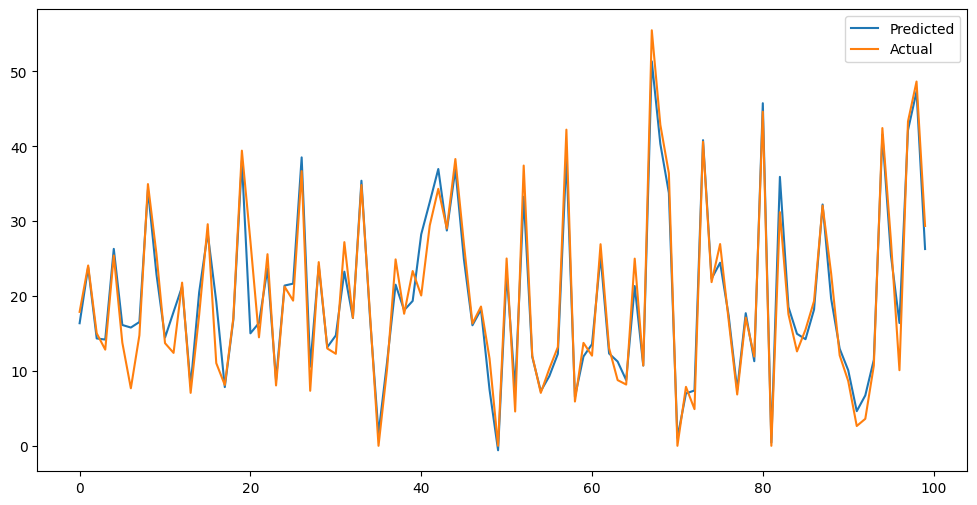

In [68]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_xgb[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### Feature Importance

In [69]:
xgb_optimal_model.feature_importances_

array([0.0594993 , 0.03795403, 0.02580271, 0.00353248, 0.00336121,
       0.01743212, 0.07030183, 0.01317835, 0.08538497, 0.01229291,
       0.643785  , 0.02747508], dtype=float32)

/tmp/ipykernel_14650/2723784907.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importance', y='feature', data=importance_df, palette='Spectral')


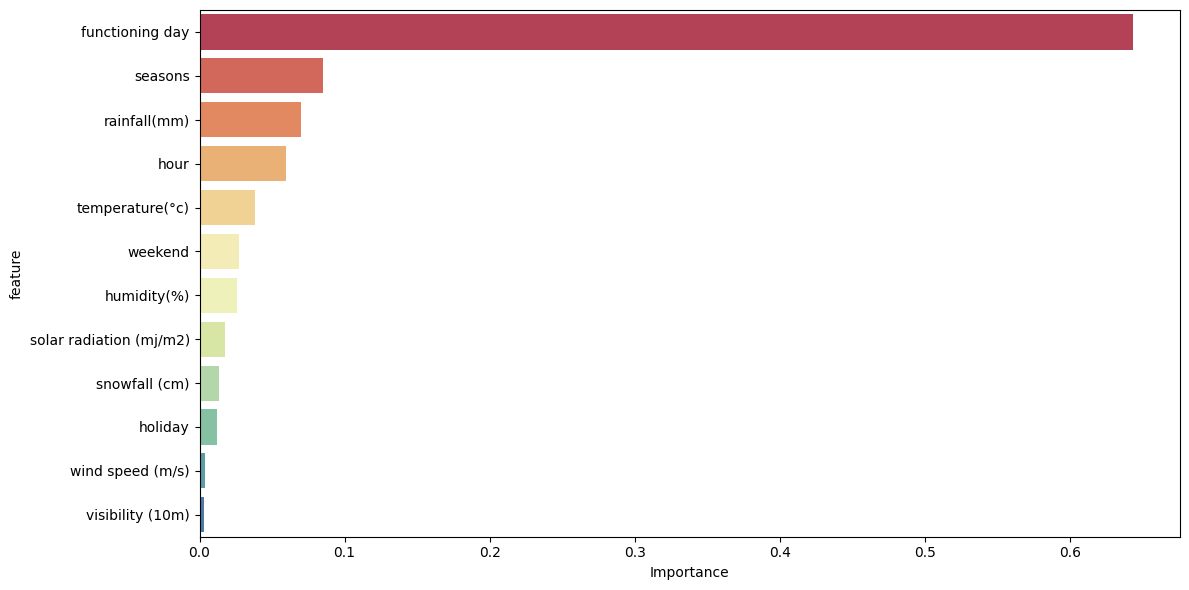

In [70]:
plot_feature_importance(xgb_optimal_model,X)

# Results

Saving all train and test results in DataFrame

In [71]:
# Creating Dataframe from all train result
train_result_df=pd.DataFrame(train_result).T.reset_index()
train_result_df.columns=["Model","MSE","RMSE","MAE","R2_score","Adj_r2_score"]
train_result_df

,Model,MSE,RMSE,MAE,R2_score,Adj_r2_score
0,Gradient Boosting,4.917277,2.217493,1.489669,0.968388,0.968243
1,XG Boost,1.453809,1.205740,0.822852,0.990654,0.990611


In [72]:
# Creating DataFrame for all test results

test_result_df = pd.DataFrame(test_result).T.reset_index()
test_result_df.columns = ['Model','MSE','RMSE','MAE','R2_score','Adj_r2_score']
test_result_df

,Model,MSE,RMSE,MAE,R2_score,Adj_r2_score
0,Gradient Boosting,10.055925,3.171108,2.080593,0.934531,0.934230
1,XG Boost,9.155642,3.025829,2.031185,0.940392,0.940119


/tmp/ipykernel_14650/3853805823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Adj_r2_score', data=test_result_df, palette=colors, ax=ax[0])
/tmp/ipykernel_14650/3853805823.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='Model', y='Adj_r2_score', data=test_result_df, palette=colors, ax=ax[0])
/tmp/ipykernel_14650/3853805823.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
/tmp/ipykernel_14650/3853805823.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

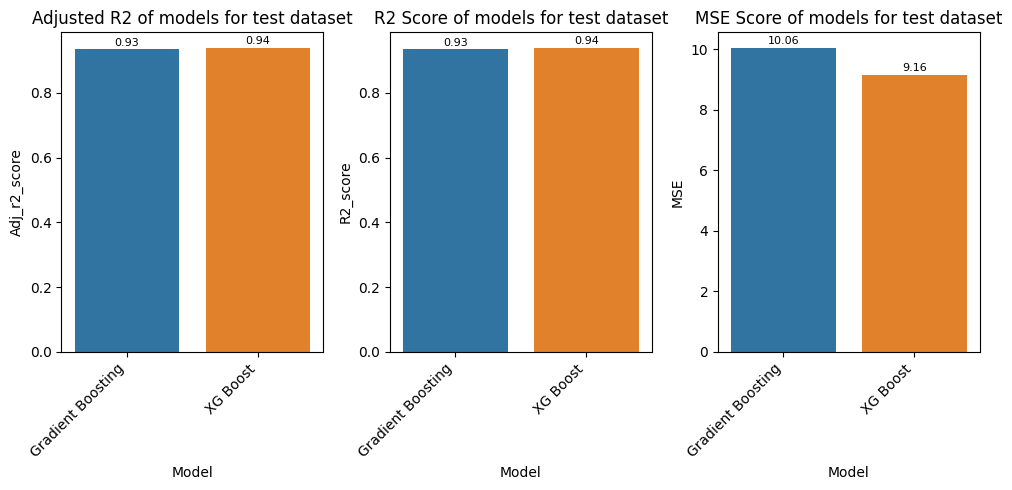

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Increase the size of the plot
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Bar plot for Adjusted R2
sns.barplot(x='Model', y='Adj_r2_score', data=test_result_df, palette=colors, ax=ax[0])
ax[0].set_title("Adjusted R2 of models for test dataset")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels

# Bar plot for R2 Score
sns.barplot(x='Model', y='R2_score', data=test_result_df, palette=colors, ax=ax[1])
ax[1].set_title("R2 Score of models for test dataset")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels

# Bar plot for MSE
sns.barplot(x='Model', y='MSE', data=test_result_df, palette=colors, ax=ax[2])
ax[2].set_title("MSE Score of models for test dataset")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels

# Add data labels on top of the bars
for a in ax:
    for p in a.patches:
        a.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.tight_layout()
plt.show()

In [74]:
# evaluation metrics of test data
evaluation_metrics(y_test, test_pred_xgb, model='XG Boost', train=False)

MSE : 9.155642436563298
RMSE : 3.0258292147051686
MAE : 2.0311849844624117
R2_score : 0.940392210049385
Adjusted R2_score : 0.9401186752580246


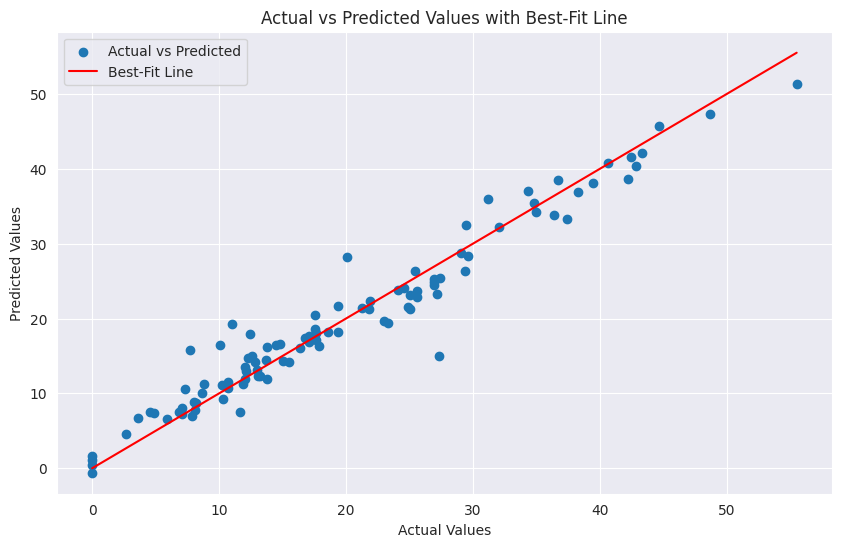

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable as pandas DataFrames or Series
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

# Use the trained model to predict the target variable on the test set
#y_pred = regressor.predict(X_test)

# Create a DataFrame to display predicted and actual values side by side
result_df = pd.DataFrame({'Predicted': test_pred_xgb[:100], 'Actual': np.array(y_test)[:100]})
#result_df = pd.DataFrame({'Predicted': test_pred_xgb[:1752], 'Actual': y_test[:1752],})
#result_df = pd.DataFrame({'Predicted': y_pred[:1752], 'Actual': y_test[:1752]})
#result_df = pd.DataFrame({'Predicted': y_pred[:1752], 'Actual': y_test[:1752]})



# Plotting the best-fit line along with the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], label='Actual vs Predicted')
plt.plot([min(result_df['Actual']), max(result_df['Actual'])], [min(result_df['Actual']), max(result_df['Actual'])], linestyle='-', color='red', label='Best-Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best-Fit Line')
plt.legend()
plt.show()

# Model Selection

## Evaluation Metrics Selection-
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

## Final Prediction Model-

* **Gradient Boosting** and **XGBoost** both models are found to be the best models. Therefore, either Gradient Boosting or XGBoost model can be used to predict the number of bikes required at each hour.
* Because the **R2 score** for **XGBoost model** is found to be slightly high , we will use **XGboost model** for final prediction.

# Model Explainability

$pip3 install shap # Done in CLI

In [76]:
from sklearn.tree import export_graphviz
import shap
import graphviz
sns.set_style('darkgrid')

## Shap for XGBoost

In [77]:
observation_1 = 2

In [78]:
# individual SHAP value plot for observation 2 of train dataset
shap.initjs()

explainer = shap.TreeExplainer(xgb_optimal_model)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[observation_1], features=X_train.iloc[observation_1], feature_names=X_train.columns)

[23:10:33] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


The output value is the prediction for that observation. Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Temperature has a positive impact on the rented bike count as it pushes it towards right.

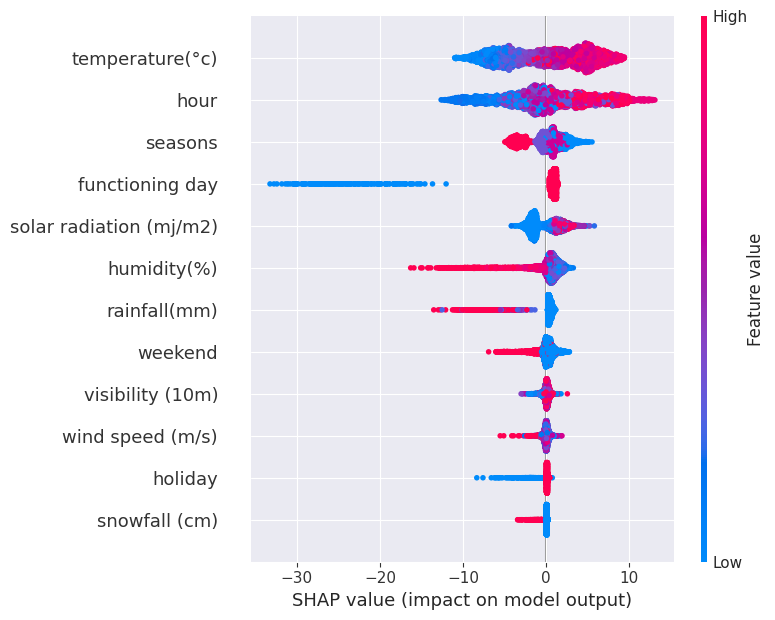

In [79]:
shap.summary_plot(shap_values, X_train)

This plot is made of all the dots un the train data. Variables are ranked in descending order. Color shows whether that variable is high or low for that observation.

A high level of temperature and hour has positive impact on the count of rental bikes. So, we can say that temperature and hour are most influential features for predicting bike count.

# Prediction using New Data

## save best performing model in joblib file format for deployment process

In [80]:
# loading dependency
# from sklearn.externals import joblib
import joblib

In [81]:
# saving our model # model - model , filename-model_jlib
joblib.dump(xgb_optimal_model , 'xgb_model_saved')

['xgb_model_saved']

In [82]:
# Load the File and predict unseen data.
# opening the file- model_jlib
xgb_model_saved = joblib.load('xgb_model_saved')

In [83]:
# check prediction
xgb_model_saved.score(X_test, y_test) #R2 Score

0.940392210049385